In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot space as inline for inline plots display
%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
#pd.set_option('display.float_format', lambda x: '%.0f' % x) 
pd.options.display.float_format = '{:,.0f}'.format

In [6]:
df = pd.read_csv('data/studio_gross.csv', float_precision=1)

In [29]:
df.head()

,studio,domestic_gross,foreign_gross,total_gross
0,BV,"415,000,000","652,000,000","1,067,000,000"
1,BV,"334,200,000","691,300,000","1,025,500,000"
2,WB,"296,000,000","664,300,000","960,300,000"
3,WB,"292,600,000","535,700,000","828,300,000"
4,P/DW,"238,700,000","513,900,000","752,600,000"


In [16]:
top10 = df.studio.value_counts().head(10)

In [17]:
top10

IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: studio, dtype: int64

In [18]:
type(top10)

pandas.core.series.Series

### loop through and sum the totals for each studio

In [31]:
df.groupby(['studio']).sum()

,domestic_gross,foreign_gross,total_gross
studio,,,
3D,"6,100,000","9,900,000","16,000,000"
A23,"164,200",0,"164,200"
A24,"324,194,200","238,462,200","562,656,400"
ADC,"248,200",0,"248,200"
AF,"2,142,900","3,500,000","5,642,900"
...,...,...,...
XL,"458,000",0,"458,000"
YFG,"1,100,000",0,"1,100,000"
Yash,"31,631,400","272,825,100","304,392,100"


In [33]:
df_agg = df.groupby(['studio']).agg('sum')

In [44]:
df_agg = df_agg.sort_values('total_gross', ascending=False).head(10)

In [56]:
df_agg['foreign_gross']


studio
BV        25,793,854,700
Fox       20,055,866,599
WB        18,667,902,998
Uni.      16,854,771,191
Sony      13,945,354,998
Par.      11,863,384,998
WB (NL)    6,339,000,000
LGF        4,482,619,300
LG/S       3,353,724,000
P/DW       3,393,600,000
Name: foreign_gross, dtype: float64

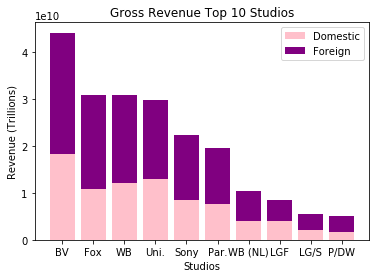

In [68]:
# an example of a bar plot 
ax = plt.subplot() # create an axis object, which the plot object which we can customize
studios = df_agg.index
dom_gross = df_agg.domestic_gross
for_gross = df_agg.foreign_gross
tot_gross = df_agg.total_gross

plt.bar(range(len(studios)), dom_gross, color='pink')
plt.bar(range(len(studios)), for_gross, color='purple', bottom=dom_gross)
plt.title('Gross Revenue Top 10 Studios')
plt.xlabel('Studios')
plt.ylabel('Revenue (Trillions)')
ax.set_xticks(range(len(studios)))
ax.set_xticklabels(studios)
#ax.set_yticks(range(len(tot_gross)))
#ax.set_yticklabels(studios)
plt.legend(['Domestic', 'Foreign'])   #must be an array, not a string
plt.show()     # add a ; to remove the crazy at the top or the grapy.
# one dimensional for bar